In [24]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
data = pd.read_csv("all.stats.txt", sep='\t')

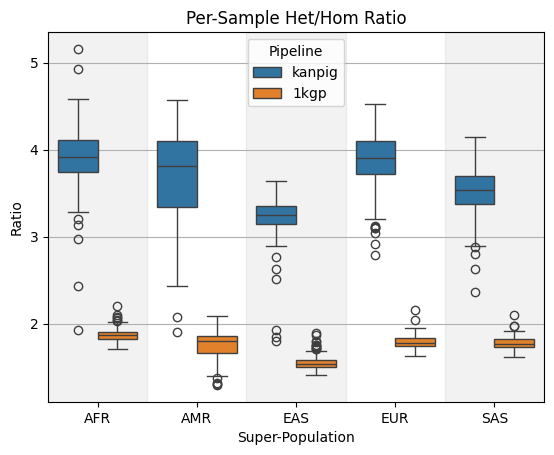

In [55]:
p = sb.boxplot(data=data, x="Population", 
               y="Het/Hom Ratio", 
               hue="Pipeline",
               hue_order=['kanpig', '1kgp'],
              order=["AFR", "AMR", "EAS", "EUR", "SAS"])
p.set(title="Per-Sample Het/Hom Ratio", ylabel="Ratio", xlabel="Super-Population")
p.set_yticks([2, 3, 4, 5])
p.set_yticklabels(["2", "3", "4", "5"])
num_categories = 5
for i in range(0, num_categories, 2):
    p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)

# Adjust x-axis limits if needed
p.set_xlim(-0.5, num_categories - 0.5)

plt.grid(axis='y', which='both')
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("genotypes/persample_hethomratio.pdf", format='pdf', bbox_inches='tight')

/var/folders/fy/lkd5_yz90zq3f67qys3tpztc0000gn/T/ipykernel_4393/2551142115.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels([int(_.get_text()) // 1000 for _ in p.get_yticklabels()])


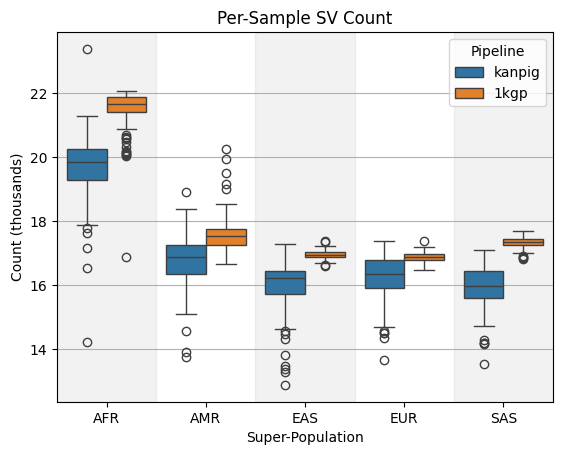

In [56]:
p = sb.boxplot(data=data, x="Population", y="Variant Count", 
               hue="Pipeline", 
               zorder=2,
               hue_order=['kanpig', '1kgp'],
              order=["AFR", "AMR", "EAS", "EUR", "SAS"])
p.set(title="Per-Sample SV Count", xlabel="Super-Population", ylabel="Count (thousands)")
plt.legend(loc='upper right', title="Pipeline")

plt.grid(axis='y', which='major', zorder=1)
p.set_yticklabels([int(_.get_text()) // 1000 for _ in p.get_yticklabels()])

num_categories = 5
for i in range(0, num_categories, 2):
    p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)
p.set_xlim(-0.5, num_categories - 0.5)
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("genotypes/persample_variantcount.pdf", format='pdf', bbox_inches='tight')

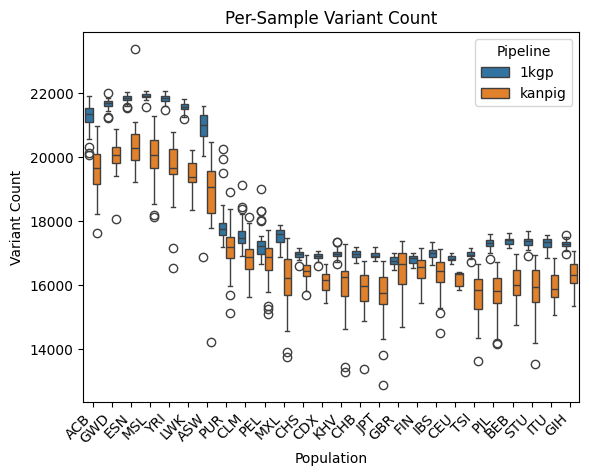

In [22]:
p = sb.boxplot(data=data, x="Super-Population", y="Variant Count", hue="Pipeline")
p.set(xlabel="Population", title="Per-Sample Variant Count")
_ = plt.xticks(rotation=45, ha='right')
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("genotypes/persample_variantcount.pdf", format='pdf', bbox_inches='tight')

In [21]:
data['Population'].unique()

array(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'], dtype=object)

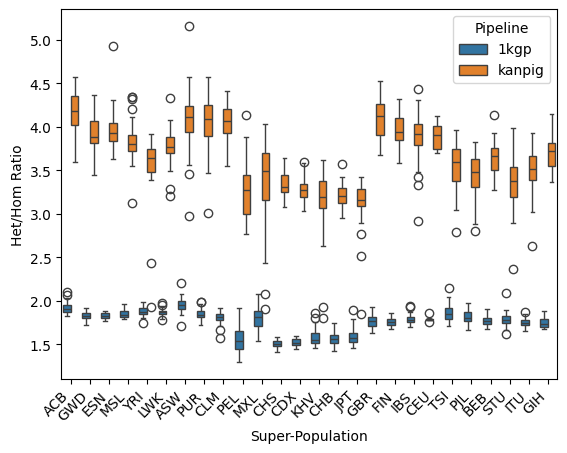

In [26]:
sb.boxplot(data=data, x="Super-Population", y="Het/Hom Ratio", hue="Pipeline")
_ = plt.xticks(rotation=45, ha='right')

In [ ]:
data

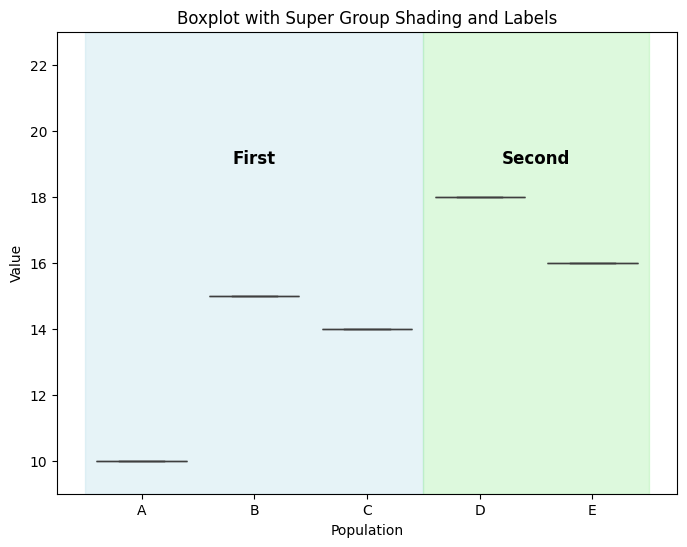

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
data = {'Population': ['A', 'B', 'C', 'D', 'E'],
        'Super': ['First', 'First', 'First', 'Second', 'Second'],
        'Value': [10, 15, 14, 18, 16]}
df = pd.DataFrame(data)

# Create boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Population', y='Value', data=df)

# Get unique Super categories and their respective Population groups
super_groups = df.groupby('Super')['Population'].apply(list).to_dict()

# Define colors for shading
colors = {
    'First': 'lightblue',  
    'Second': 'lightgreen',  # Seaborn's default light orange
    'Third': '#b3e2cd',  # Light green
    'Fourth': '#f4cae4',  # Light pink
    'Fifth': '#decbe4'  # Light purple
}
# Iterate over Super groups and shade the respective areas
for super_value, populations in super_groups.items():
    # Get the x-axis range of the current Super group
    first_pop_idx = df['Population'].unique().tolist().index(populations[0])
    last_pop_idx = df['Population'].unique().tolist().index(populations[-1])
    
    # Shade background for this Super group
    ax.axvspan(first_pop_idx - 0.5, last_pop_idx + 0.5, color=colors[super_value], alpha=0.3)
    
    # Add text in the center of the shaded area
    center = (first_pop_idx + last_pop_idx) / 2
    ax.text(center, max(df['Value']) + 1, super_value, ha='center', fontsize=12, fontweight='bold')

# Set plot limits and labels
plt.ylim([df['Value'].min() - 1, df['Value'].max() + 5])
plt.title('Boxplot with Super Group Shading and Labels')
plt.show()
